<a href="https://colab.research.google.com/github/imeast/2019ML_Model_Comparison/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Make sure that the Data is the letter recognition data from UCI
from google.colab import files
uploaded = files.upload()

Saving letter-recognition.data to letter-recognition.data


In [ ]:
# Put data into a pandas DataFrame and seperating data into rows and splitting columns by ','
data = pd.read_csv('letter-recognition.data',
                   sep=',',
                   header=None,
                   names=['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])

In [ ]:
X = np.array(data[:].drop(['letter'], 1))
y = np.array(data[:]['letter'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Naive Bayes Gaussian Model

from sklearn.naive_bayes import GaussianNB

nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
nbP = nbModel.predict(X_test)
print("Gaussian Naive Bayes accuracy: %.3f" %(accuracy_score(y_test,nbP)))

Gaussian Naive Bayes accuracy: 0.642


In [ ]:
# Naive Bayes Multinomial Model

from sklearn.naive_bayes import MultinomialNB

nModel = MultinomialNB()
nModel.fit(X_train, y_train)
nP = nModel.predict(X_test)
print("Multinomial Naive Bayes accuracy: %.3f" %(accuracy_score(y_test,nP)))

Multinomial Naive Bayes accuracy: 0.552


In [ ]:
# SVC Model

from sklearn.svm import SVC

for c in [0.01, 0.1, 1, 10]:
    svcModel = SVC(kernel = 'linear',C=c)
    svcModel.fit(X_train, y_train)
    svcP = svcModel.predict(X_test)
    print("C: %f accuracy: %f" %(c,accuracy_score(y_test, svcP))) 

C: 0.010000 accuracy: 0.837667
C: 0.100000 accuracy: 0.854500
C: 1.000000 accuracy: 0.856000
C: 10.000000 accuracy: 0.852500


In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

treeP = tree.predict(X_test)
print("Decision Tree accuracy: %.3f" %(accuracy_score(y_test, treeP))) # Accuracy changes with every run

Decision Tree accuracy: 0.880


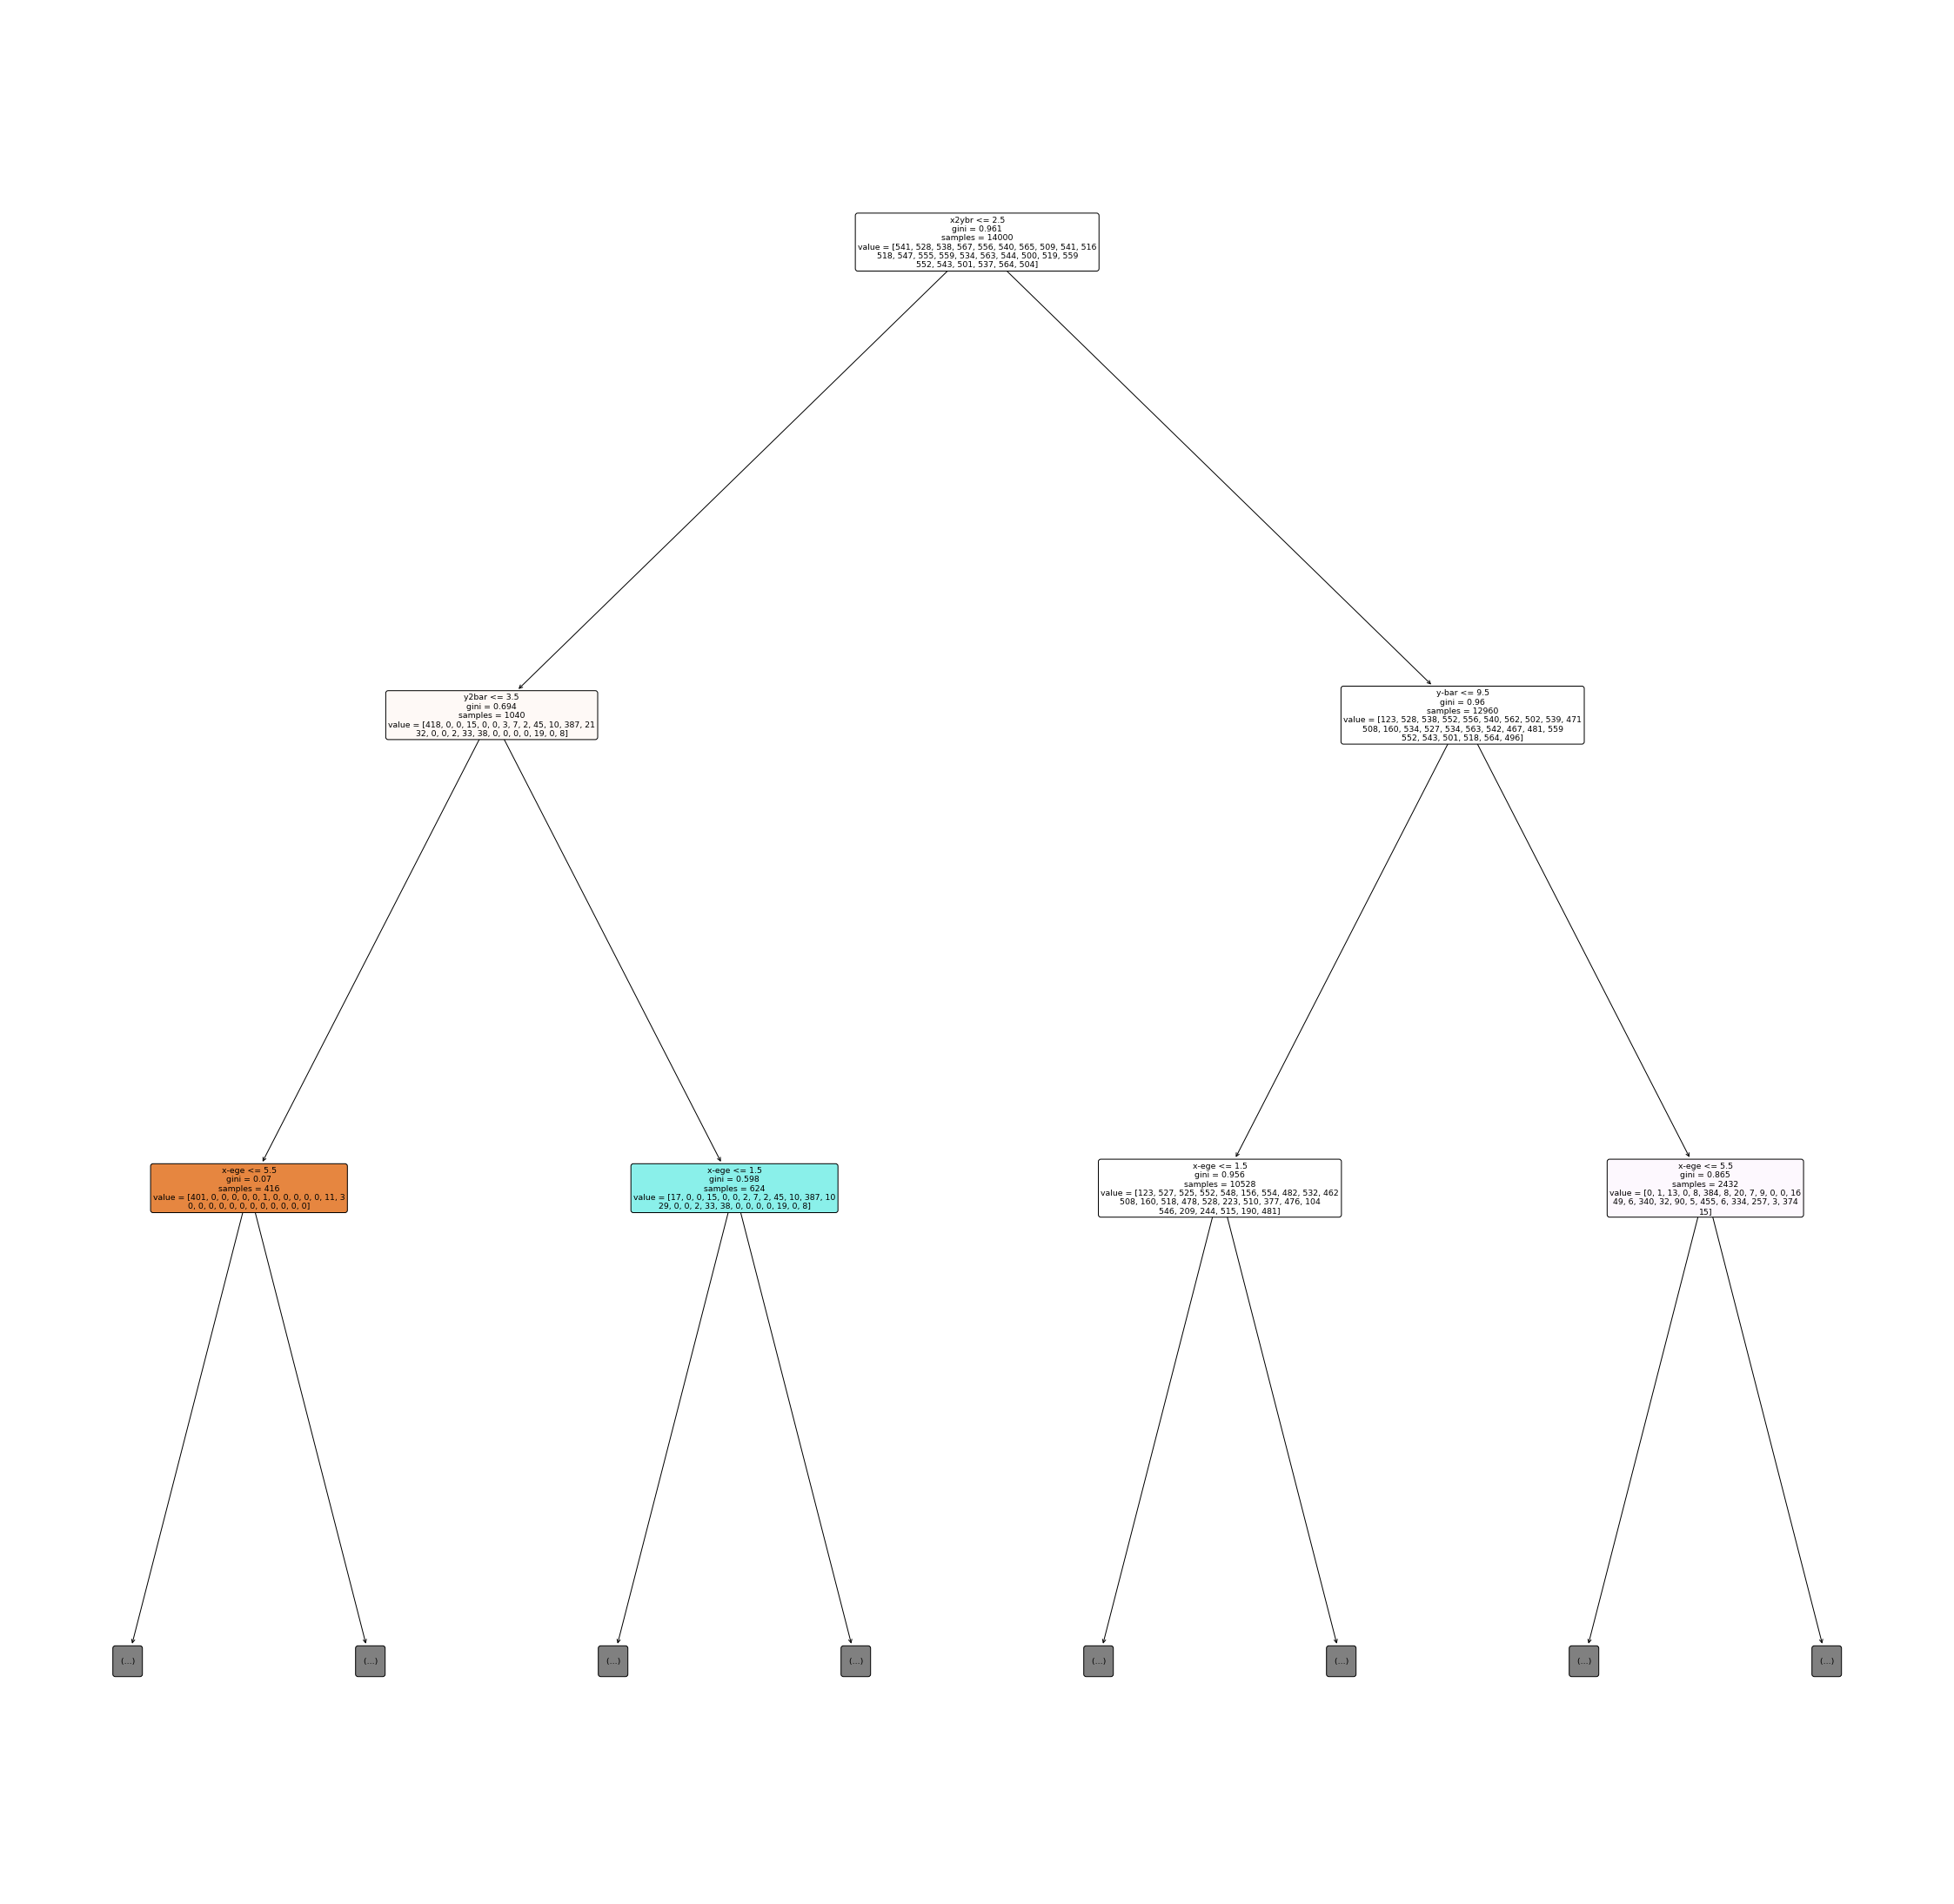

In [ ]:
# Decision Tree Model Graph

import matplotlib.pyplot as plt

attr = list(data.columns[1:])
plt.figure(figsize=(40, 40)) # can change the figure size by changing these numbers
plot_tree(tree, max_depth=2, feature_names=attr, filled=True, rounded=True)
plt.show()